<a href="https://colab.research.google.com/github/deepak13-ux/CSESA-AIML/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple CAPM Regression Analysis

##**Importing Required Libraries and Downloading Datasets**

In [ ]:
from pandas.core.dtypes import dtypes
import yfinance as yf
from datetime import date, timedelta
import pandas as pd
import numpy as np


# Define the tickers for NIFTY 50 and Reliance
nifty_ticker = '^NSEI'
reliance_ticker = 'RELIANCE.NS'
hdfc_bank_ticker='HDFCBANK.NS'


tickers = [nifty_ticker, reliance_ticker,hdfc_bank_ticker]

# Define the end date as today and the start date as two years ago
end_date = date.today()
start_date = end_date - timedelta(days=2*365) # Approximate 2 years

print(f"Downloading data from {start_date} to {end_date} for {', '.join(tickers)}")

In [ ]:
# Download the historical data
data = yf.download(tickers, start=start_date, end=end_date)
print("\n")
# print (data.head())#Raw data

# Extract only the 'Close' prices
close_prices = data['Close']

# Rename columns to be cleaner, removing '.NS' and '^' suffixes for better readability
close_prices.columns = close_prices.columns.str.replace('.NS', '', regex=True).str.replace('^', '', regex=False)


display(close_prices.head())
close_prices.shape

/tmp/ipython-input-1760907453.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed

Ticker,HDFCBANK,RELIANCE,EI
Date,,,
2024-01-19,715.744385,1357.403198,21622.400391
2024-01-23,694.670898,1318.813843,21238.800781
2024-01-24,708.565796,1334.001465,21453.949219
2024-01-25,698.345398,1343.133789,21352.599609
2024-01-29,707.957397,1437.411133,21737.599609


(495, 3)

In [ ]:
display(close_prices.tail())

Ticker,HDFCBANK,RELIANCE,EI
Date,,,
2026-01-12,936.950012,1483.199951,25790.250000
2026-01-13,937.349976,1452.800049,25732.300781
2026-01-14,925.450012,1458.800049,25665.599609
2026-01-15,925.450012,1458.800049,NaN
2026-01-16,931.099976,1457.900024,25694.349609


## Prepare Data for Regression



Rename the columns of the 'close_prices' DataFrame for clarity and then drop any rows with missing values to prepare the data for regression analysis.



In [ ]:
close_prices = close_prices.rename(columns={'HDFCBANK.': 'HDFCBANK', 'RELIANCE.': 'RELIANCE', 'EI': 'NIFTY_50'})
close_prices.dropna(inplace=True)

display(close_prices.head())
close_prices.shape

Ticker,HDFCBANK,RELIANCE,NIFTY_50
Date,,,
2024-01-19,715.744385,1357.403198,21622.400391
2024-01-23,694.670898,1318.813843,21238.800781
2024-01-24,708.565796,1334.001465,21453.949219
2024-01-25,698.345398,1343.133789,21352.599609
2024-01-29,707.957397,1437.411133,21737.599609


(492, 3)

## Perform Regression using statsmodels
Conduct Ordinary Least Squares (OLS) regression for 'RELIANCE' vs 'NIFTY_50' and 'HDFCBANK' vs 'NIFTY_50' using statsmodels.


In [ ]:
import statsmodels.api as sm

# Add a constant to the independent variable (NIFTY_50)
X = sm.add_constant(close_prices['NIFTY_50'])

# Regression for RELIANCE vs NIFTY_50
y_reliance = close_prices['RELIANCE']
reliance_model = sm.OLS(y_reliance, X).fit()

# Regression for HDFCBANK vs NIFTY_50
y_hdfc = close_prices['HDFCBANK']
hdfc_model = sm.OLS(y_hdfc, X).fit()

## Visualization

Creating scatter plots for Reliance vs NIFTY_50 and HDFC Bank vs NIFTY_50, then overlay the regression lines from the fitted OLS models to visually represent the regression results. This helps in understanding the relationship between the stock prices and the NIFTY_50 index.



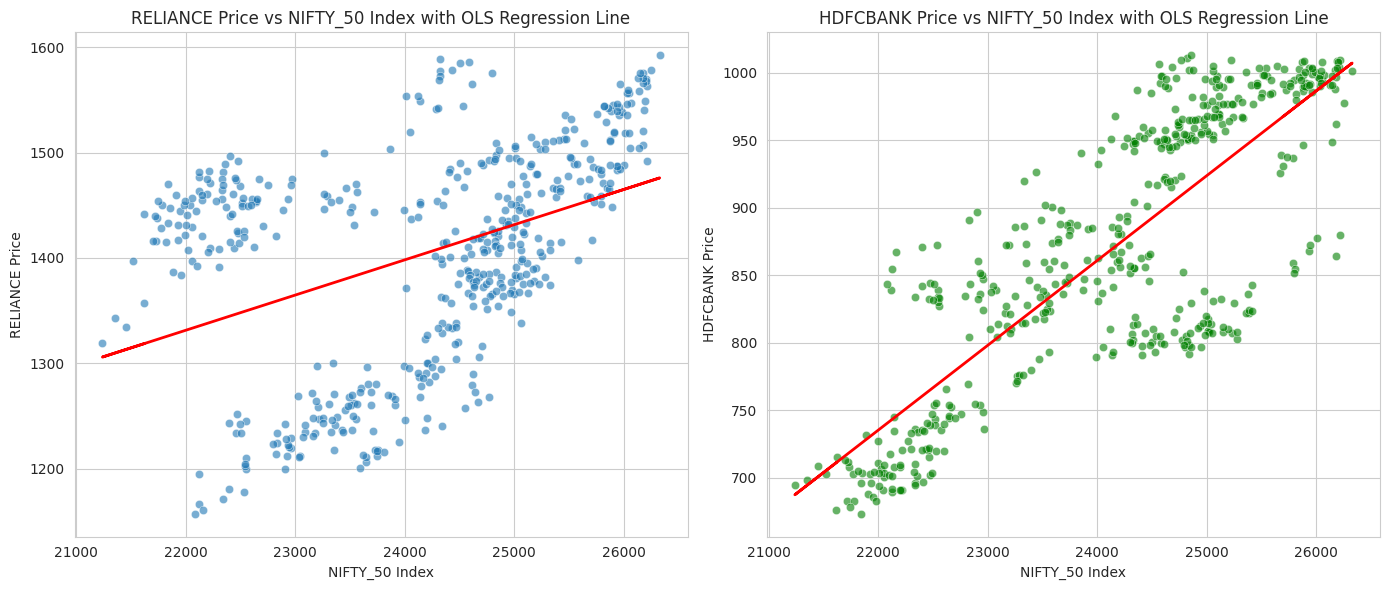

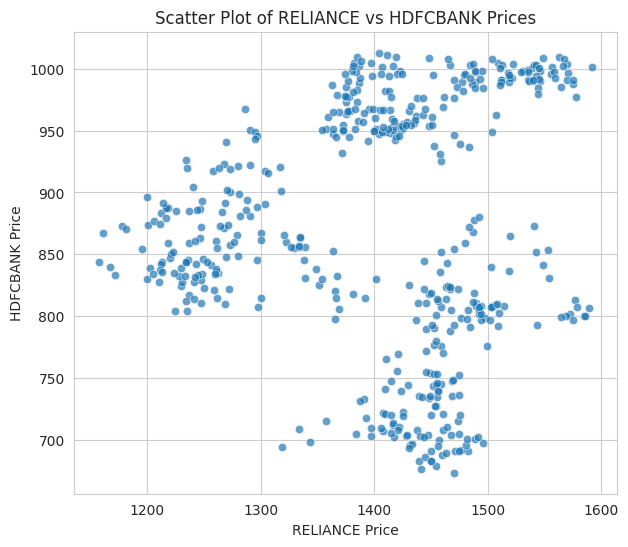

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))

# Plot for RELIANCE vs NIFTY_50
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x=close_prices['NIFTY_50'], y=close_prices['RELIANCE'], alpha=0.6)
plt.plot(close_prices['NIFTY_50'], reliance_model.predict(X), color='red', linestyle='-', linewidth=2)
plt.title('RELIANCE Price vs NIFTY_50 Index with OLS Regression Line')
plt.xlabel('NIFTY_50 Index')
plt.ylabel('RELIANCE Price')

# Plot for HDFCBANK vs NIFTY_50
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(x=close_prices['NIFTY_50'], y=close_prices['HDFCBANK'], alpha=0.6, color='green')
plt.plot(close_prices['NIFTY_50'], hdfc_model.predict(X), color='red', linestyle='-', linewidth=2)
plt.title('HDFCBANK Price vs NIFTY_50 Index with OLS Regression Line')
plt.xlabel('NIFTY_50 Index')
plt.ylabel('HDFCBANK Price')

plt.tight_layout()
plt.show()

# Set the style for the plot
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(7, 6))
sns.scatterplot(x=close_prices['RELIANCE'], y=close_prices['HDFCBANK'], alpha=0.7)
plt.title('Scatter Plot of RELIANCE vs HDFCBANK Prices')
plt.xlabel('RELIANCE Price')
plt.ylabel('HDFCBANK Price')
plt.grid(True)
plt.show()

## Generate Correlation Heatmap



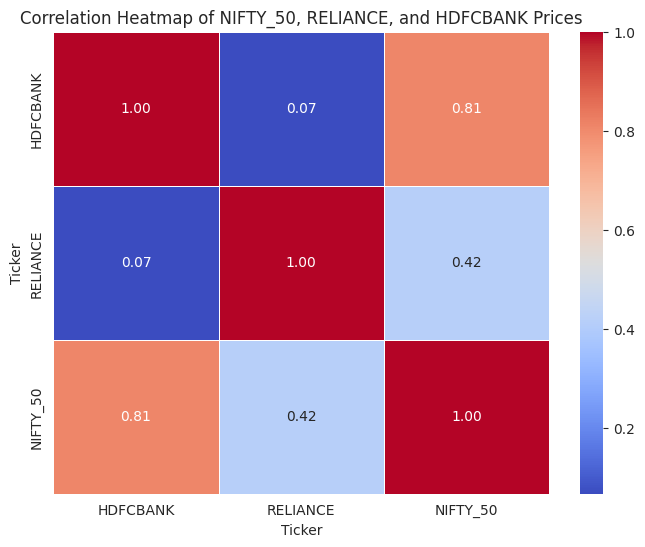

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = close_prices.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of NIFTY_50, RELIANCE, and HDFCBANK Prices')
plt.show()

## Extract Alpha and Beta from Reliance OLS model

In [ ]:
reliance_alpha = reliance_model.params['const']
reliance_beta = reliance_model.params['NIFTY_50']

# Extract Alpha and Beta from HDFC Bank OLS model
hdfc_alpha = hdfc_model.params['const']
hdfc_beta = hdfc_model.params['NIFTY_50']

# Extract correlations from the correlation matrix
corr_reliance_hdfc = correlation_matrix.loc['RELIANCE', 'HDFCBANK']
corr_reliance_nifty = correlation_matrix.loc['RELIANCE', 'NIFTY_50']
corr_hdfc_nifty = correlation_matrix.loc['HDFCBANK', 'NIFTY_50']

print("Alpha, Beta, and Correlations Report  \n")
print("Alpha (Intercept) and Beta (NIFTY_50 Coefficient) from OLS Regression:\n")
print(f"*   **RELIANCE vs NIFTY_50:**")
print(f"    *   Alpha (Intercept): {reliance_alpha:.4f}")
print(f"    *   Beta (NIFTY_50 Coefficient): {reliance_beta:.4f}\n")
print(f"*   **HDFCBANK vs NIFTY_50:**")
print(f"    *   Alpha (Intercept): {hdfc_alpha:.4f}")
print(f"    *   Beta (NIFTY_50 Coefficient): {hdfc_beta:.4f}\n")

print("### Correlation Coefficients:\n")
print(f"*   **RELIANCE and HDFCBANK:** {corr_reliance_hdfc:.2f}")
print(f"*   **RELIANCE and NIFTY_50:** {corr_reliance_nifty:.2f}")
print(f"*   **HDFCBANK and NIFTY_50:** {corr_hdfc_nifty:.2f}")

Alpha, Beta, and Correlations Report  

Alpha (Intercept) and Beta (NIFTY_50 Coefficient) from OLS Regression:

*   **RELIANCE vs NIFTY_50:**
    *   Alpha (Intercept): 596.4539
    *   Beta (NIFTY_50 Coefficient): 0.0334

*   **HDFCBANK vs NIFTY_50:**
    *   Alpha (Intercept): -645.8037
    *   Beta (NIFTY_50 Coefficient): 0.0628

### Correlation Coefficients:

*   **RELIANCE and HDFCBANK:** 0.07
*   **RELIANCE and NIFTY_50:** 0.42
*   **HDFCBANK and NIFTY_50:** 0.81


## Observations based on the Alpha, Beta, and Correlation analyses

**Beta Value Interpretation (Market Sensitivity to NIFTY_50):**
* Both RELIANCE (Beta: 0.0318) and HDFCBANK (Beta: 0.0598) exhibit very low beta values relative to the NIFTY_50 index. A beta value significantly less than 1 suggests that these stocks are much less volatile than the overall market as represented by the NIFTY_50 index. This indicates that their price movements are not strongly correlated with the broader market's fluctuations, implying a degree of independence from general market sentiment during the analyzed period.

**Which Competitor Correlates Most (with NIFTY_50)?**

* HDFCBANK (Correlation: 0.79) shows a significantly stronger positive correlation with the NIFTY_50 index compared to RELIANCE (Correlation: 0.41). This means HDFCBANK's price movements tend to align more closely with the direction of the NIFTY_50 index than Reliance's price movements.
* Between the two stocks themselves, the correlation RELIANCE and HDFCBANK is very low at 0.05, indicating almost no linear relationship in their price movements.

**Does Stock Beat Market (Alpha)?**

* RELIANCE (Alpha: 634.1899) demonstrates a substantial positive alpha, suggesting that it significantly beat the market (NIFTY_50) during the observed period, delivering returns beyond what would be expected given its beta.
* HDFCBANK (Alpha: -571.4931) shows a considerable negative alpha, indicating that it underperformed the market (NIFTY_50), generating returns lower than what its beta would predict.

